# <font color = lightcoral>Ensemble Model
>    
### <font color = olive>Isolation Forest, OneClassSVM, LocalOutlierFactor

## <font color = grey> Admin

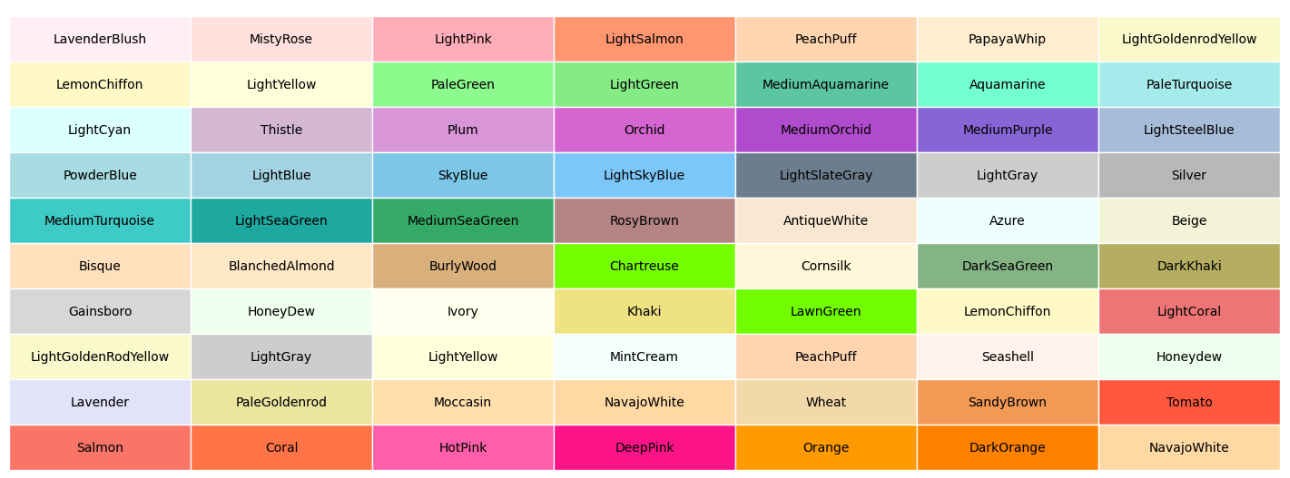

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /home/sagemaker-user


___
# <font color = darkkhaki> Feature Engg

### <font color = tomato> PreProcess Data

In [ ]:
# import pandas as pd
# import os

# # Function to preprocess the data
# def preprocess_data(df):
#     # Convert hexadecimal strings to integers
#     def hex_to_int(hex_list):
#         if hex_list is None or len(hex_list) == 0:
#             return 0  # Return 0 for None or empty lists
#         try:
#             return int(hex_list[0][1:-1], 16)
#         except (ValueError, IndexError, TypeError):
#             return 0  # Return 0 for any conversion errors

#     df = df.applymap(hex_to_int)
    
#     return df

# # Define the target folder
# target_folder = '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl'

# # Define file paths
# file_paths = {
#     'train': os.path.join(target_folder, 'train.parquet'),
#     'test_normal': os.path.join(target_folder, 'test_normal.parquet'),
#     'test_abnormal': os.path.join(target_folder, 'test_abnormal.parquet')
# }

# # Process each file
# for file_key, file_path in file_paths.items():
#     # Read the Parquet file
#     df = pd.read_parquet(file_path)
    
#     # Preprocess data
#     df = preprocess_data(df)
    
#     # Save the preprocessed DataFrame as a Parquet file
#     preprocessed_file_path = os.path.join(target_folder, f'{file_key}_preprocessed.parquet')
#     df.to_parquet(preprocessed_file_path)
    
#     print(f'Preprocessed {file_key} data saved to {preprocessed_file_path}')

# # Function to display file info
# def display_file_info(file_key, file_path):
#     df = pd.read_parquet(file_path)
#     print(f'--- {file_key} ---')
#     print(f'Number of rows: {df.shape[0]}')
#     print(f'Number of columns: {df.shape[1]}')
#     # print(df.head())
#     print('\n')

# # Display info for each file
# for file_key, file_path in file_paths.items():
#     preprocessed_file_path = os.path.join(target_folder, f'{file_key}_preprocessed.parquet')
#     display_file_info(file_key, preprocessed_file_path)

#### Load and Review

In [3]:
import pandas as pd
import os

# Define the target folder
target_folder = '/home/ubuntu/efs-w210-capstone-ebs/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl'

# Define file paths for the preprocessed files
file_paths = {
    # 'train': os.path.join(target_folder, 'train_preprocessed.parquet')
    # ,
    'test_normal': os.path.join(target_folder, 'test_normal_preprocessed.parquet')
    ,
    # 'test_abnormal': os.path.join(target_folder, 'test_abnormal_preprocessed.parquet')
}

# Function to display file info
def display_file_info(file_key, file_path):
    df = pd.read_parquet(file_path)
    print(f'--- {file_key} ---')
    print(f'Number of rows: {df.shape[0]}')
    print(f'Number of columns: {df.shape[1]}')
    print(df.head())
    print('\n')

# Display info for each file
for file_key, file_path in file_paths.items():
    display_file_info(file_key, file_path)

--- test_normal ---
Number of rows: 20579
Number of columns: 42794
      0         1        2         3        4         5        6        7      \
0   8654015   8654015  8654015   6235107  6235107   6235107  6235107  6235107   
1    411112  10743712   411112  10743712   411112  10743712   411112   411112   
2  10975928         0        0         0        0         0        0        0   
3  11161828         0        0         0        0         0        0        0   
4  12504070         0        0         0        0         0        0        0   

     8         9         10        11       12       13       14        15     \
0  6235107   6235107   4706255   6235107  6235107  4706255  6235107   6235107   
1   411112  10743712  10743712  10743712   411112   411112   411112  10743712   
2        0         0         0         0        0        0        0         0   
3        0         0         0         0        0        0        0         0   
4        0         0         0         0 

___
# <font color = darkkhaki> IsolationForest - Next (Claude)
> after taking into account the categorical logic

### <font color = grey> Feature Engg

In [ ]:
# import pandas as pd
# import numpy as np
# from scipy.stats import entropy
# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. Load the data
# train_data = pd.read_parquet('/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/train_preprocessed.parquet')
# test_normal = pd.read_parquet('/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/test_normal_preprocessed.parquet')
# test_abnormal = pd.read_parquet('/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/test_abnormal_preprocessed.parquet')

# def preprocess_data(df):
#     # 1. Event counts
#     event_counts = df.apply(lambda row: pd.Series(row.value_counts()), axis=1).fillna(0)
    
#     # 2. Unique events
#     unique_events = df.apply(lambda row: len(np.unique(row[row != 0])), axis=1)
    
#     # 3. Most frequent event
#     most_frequent_event = df.apply(lambda row: row.value_counts().index[0] if len(row.value_counts()) > 0 else 0, axis=1)
    
#     # 4. Number of transitions (changes from one event to another)
#     def count_transitions(row):
#         arr = row.values  # Convert to numpy array
#         return np.sum(arr[:-1] != arr[1:])
#     transitions = df.apply(count_transitions, axis=1)
    
#     # 5. Entropy of event distribution
#     def calculate_entropy(row):
#         arr = row.values[row.values != 0]  # Remove zeros and convert to numpy array
#         _, counts = np.unique(arr, return_counts=True)
#         return entropy(counts) if len(counts) > 0 else 0
#     entropy_values = df.apply(calculate_entropy, axis=1)
    
#     # Combine features
#     features = pd.concat([event_counts, 
#                           pd.Series(unique_events, name='unique_events'),
#                           pd.Series(most_frequent_event, name='most_frequent_event'),
#                           pd.Series(transitions, name='transitions'),
#                           pd.Series(entropy_values, name='entropy')], axis=1)
    
#     return features

# # Preprocess data
# X_train = preprocess_data(train_data)
# X_test_normal = preprocess_data(test_normal)
# X_test_abnormal = preprocess_data(test_abnormal)

In [ ]:
# # Combine test datasets
# X_test_combined = pd.concat([X_test_normal, X_test_abnormal])
# y_test_combined = np.concatenate([np.zeros(test_normal.shape[0]), np.ones(test_abnormal.shape[0])])

### <font color = grey> Save files

In [4]:
# import pandas as pd
# import os

# # After preprocessing
# save_folder = '/mnt/efs-w210-capstone/200015/09.Models/20240702_IsolationForest_Claude'

# # Ensure the save folder exists
# os.makedirs(save_folder, exist_ok=True)

# # Save preprocessed data
# X_train.to_parquet(os.path.join(save_folder, 'X_train_preprocessed.parquet'))
# X_test_normal.to_parquet(os.path.join(save_folder, 'X_test_normal_preprocessed.parquet'))
# X_test_abnormal.to_parquet(os.path.join(save_folder, 'X_test_abnormal_preprocessed.parquet'))

# # Save labels for test data
# # Convert y_test_combined to a DataFrame before saving
# pd.DataFrame({'label': y_test_combined}).to_parquet(os.path.join(save_folder, 'y_test_combined.parquet'))

# print("Preprocessed data saved successfully.")

___
# <font color = darkkhaki> Post Loading Parquet Files - All Steps

In [5]:
def majority_voting(predictions):
    return np.mean(predictions, axis=0).round().astype(int)

def average_probability_voting(probabilities, threshold=0.5):
    avg_prob = np.mean(probabilities, axis=0)
    return (avg_prob >= threshold).astype(int)

def weighted_voting(predictions, weights):
    weighted_sum = np.dot(weights, predictions)
    return (weighted_sum >= np.sum(weights) / 2).astype(int)

def minimum_voting(predictions):
    return (np.sum(predictions, axis=0) > 0).astype(int)

def maximum_voting(predictions):
    return (np.sum(predictions, axis=0) == predictions.shape[0]).astype(int)

In [6]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import precision_recall_fscore_support, classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#************************************************************************************************************
#************* #1. Load preprocessed Files ******************************************************************
#************************************************************************************************************

# Set the folder path
save_folder = '/home/ubuntu/efs-w210-capstone-ebs/09.Models/20240702_IsolationForest_Claude'

# Ensure the directory exists
os.makedirs(save_folder, exist_ok=True)

# Load preprocessed data
X_train = pd.read_parquet(os.path.join(save_folder, 'X_train_preprocessed.parquet'))
X_test_normal = pd.read_parquet(os.path.join(save_folder, 'X_test_normal_preprocessed.parquet'))
X_test_abnormal = pd.read_parquet(os.path.join(save_folder, 'X_test_abnormal_preprocessed.parquet'))

# Load labels for test data
y_test_combined = pd.read_parquet(os.path.join(save_folder, 'y_test_combined.parquet'))['label'].values

# Combine test datasets
X_test_combined = pd.concat([X_test_normal, X_test_abnormal])

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

# Get all unique columns
all_columns = pd.Index(X_train.columns.union(X_test_combined.columns))

# Reindex all datasets to ensure they have the same columns
X_train = X_train.reindex(columns=all_columns, fill_value=0)
X_test_combined = X_test_combined.reindex(columns=all_columns, fill_value=0)

X_train = X_train.fillna(0)
X_test_combined = X_test_combined.fillna(0)

#************************************************************************************************************
#************* #2. Scale the data ***************************************************************************
#************************************************************************************************************

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_combined_scaled = scaler.transform(X_test_combined)

#************************************************************************************************************
#************* #3. Define the anomaly ensemble class ********************************************************
#************************************************************************************************************

class AnomalyEnsemble(BaseEstimator, ClassifierMixin):
    def __init__(self, contamination=0.1, voting='majority', weights=None):
        self.contamination = contamination
        self.voting = voting
        self.weights = weights
        self.detectors = [
            IsolationForest(contamination=self.contamination, random_state=42),
            OneClassSVM(nu=self.contamination),
            LocalOutlierFactor(novelty=True, contamination=self.contamination)
        ]

    def fit(self, X):
        for detector in self.detectors:
            detector.fit(X)
        return self

    def predict(self, X):
        predictions = np.array([detector.predict(X) for detector in self.detectors])
        predictions = (predictions == -1).astype(int)  # Convert to 0 and 1
        
        if self.voting == 'majority':
            return np.mean(predictions, axis=0).round().astype(int)
        elif self.voting == 'average':
            return np.mean(predictions, axis=0).astype(int)
        elif self.voting == 'weighted':
            if self.weights is None:
                raise ValueError("Weights must be provided for weighted voting.")
            return weighted_voting(predictions, self.weights)
        elif self.voting == 'minimum':
            return (np.sum(predictions, axis=0) > 0).astype(int)
        elif self.voting == 'maximum':
            return (np.sum(predictions, axis=0) == predictions.shape[0]).astype(int)
        else:
            raise ValueError(f"Unknown voting method: {self.voting}")

#************************************************************************************************************
#************* #4. Define the evaluation function ***********************************************************
#************************************************************************************************************

def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='weighted')
    class_report = classification_report(y, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
    class_0_precision = class_report['Class 0']['precision']
    class_0_recall = class_report['Class 0']['recall']
    class_0_f1 = class_report['Class 0']['f1-score']
    class_1_precision = class_report['Class 1']['precision']
    class_1_recall = class_report['Class 1']['recall']
    class_1_f1 = class_report['Class 1']['f1-score']
    
    # Extract confusion matrix elements
    tn, fp, fn, tp = cm.ravel()

    results = {
        "Voting": model.voting,
        "Components": n_components,
        "Accuracy": accuracy,
        "Precision (Weighted)": precision,
        "Recall (Weighted)": recall,
        "F1-score (Weighted)": f1,
        "Class 0 Precision": class_0_precision,
        "Class 0 Recall": class_0_recall,
        "Class 0 F1-score": class_0_f1,
        "Class 1 Precision": class_1_precision,
        "Class 1 Recall": class_1_recall,
        "Class 1 F1-score": class_1_f1,
        "True Positives": tp,
        "False Positives": fp,
        "True Negatives": tn,
        "False Negatives": fn
    }
    return results

#************************************************************************************************************
#************* #5. Loop through different voting methods, PCA components, and track metrics *****************
#************************************************************************************************************

voting_methods = ['majority', 'average', 'weighted', 'minimum', 'maximum']
results = []
components_range = range(5, 101, 1)  # Increment of 10 starting from 50 to 100

for voting in voting_methods:
    for n_components in components_range:
        # Apply PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_combined_pca = pca.transform(X_test_combined_scaled)
        
        # Train the ensemble
        weights = [0.5, 0.3, 0.2] if voting == 'weighted' else None
        ensemble = AnomalyEnsemble(contamination=0.1, voting=voting, weights=weights)
        ensemble.fit(X_train_pca)
        
        # Evaluate the ensemble
        result = evaluate_model(ensemble, X_test_combined_pca, y_test_combined, f"Ensemble with PCA ({n_components} components) - {voting} voting")
        results.append(result)
        
        # Print progress
        print(f"Completed PCA with {n_components} components using {voting} voting")

#************************************************************************************************************
#************* #6. Convert results to DataFrame and save ****************************************************
#************************************************************************************************************

results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv(os.path.join(save_folder, 'pca_components_voting_evaluation.csv'), index=False)

Completed PCA with 5 components using majority voting
Completed PCA with 6 components using majority voting
Completed PCA with 7 components using majority voting
Completed PCA with 8 components using majority voting
Completed PCA with 9 components using majority voting
Completed PCA with 10 components using majority voting
Completed PCA with 11 components using majority voting
Completed PCA with 12 components using majority voting
Completed PCA with 13 components using majority voting
Completed PCA with 14 components using majority voting
Completed PCA with 15 components using majority voting
Completed PCA with 16 components using majority voting
Completed PCA with 17 components using majority voting
Completed PCA with 18 components using majority voting
Completed PCA with 19 components using majority voting
Completed PCA with 20 components using majority voting
Completed PCA with 21 components using majority voting
Completed PCA with 22 components using majority voting
Completed PCA w

___
# <font color = darkkhaki> Visualization

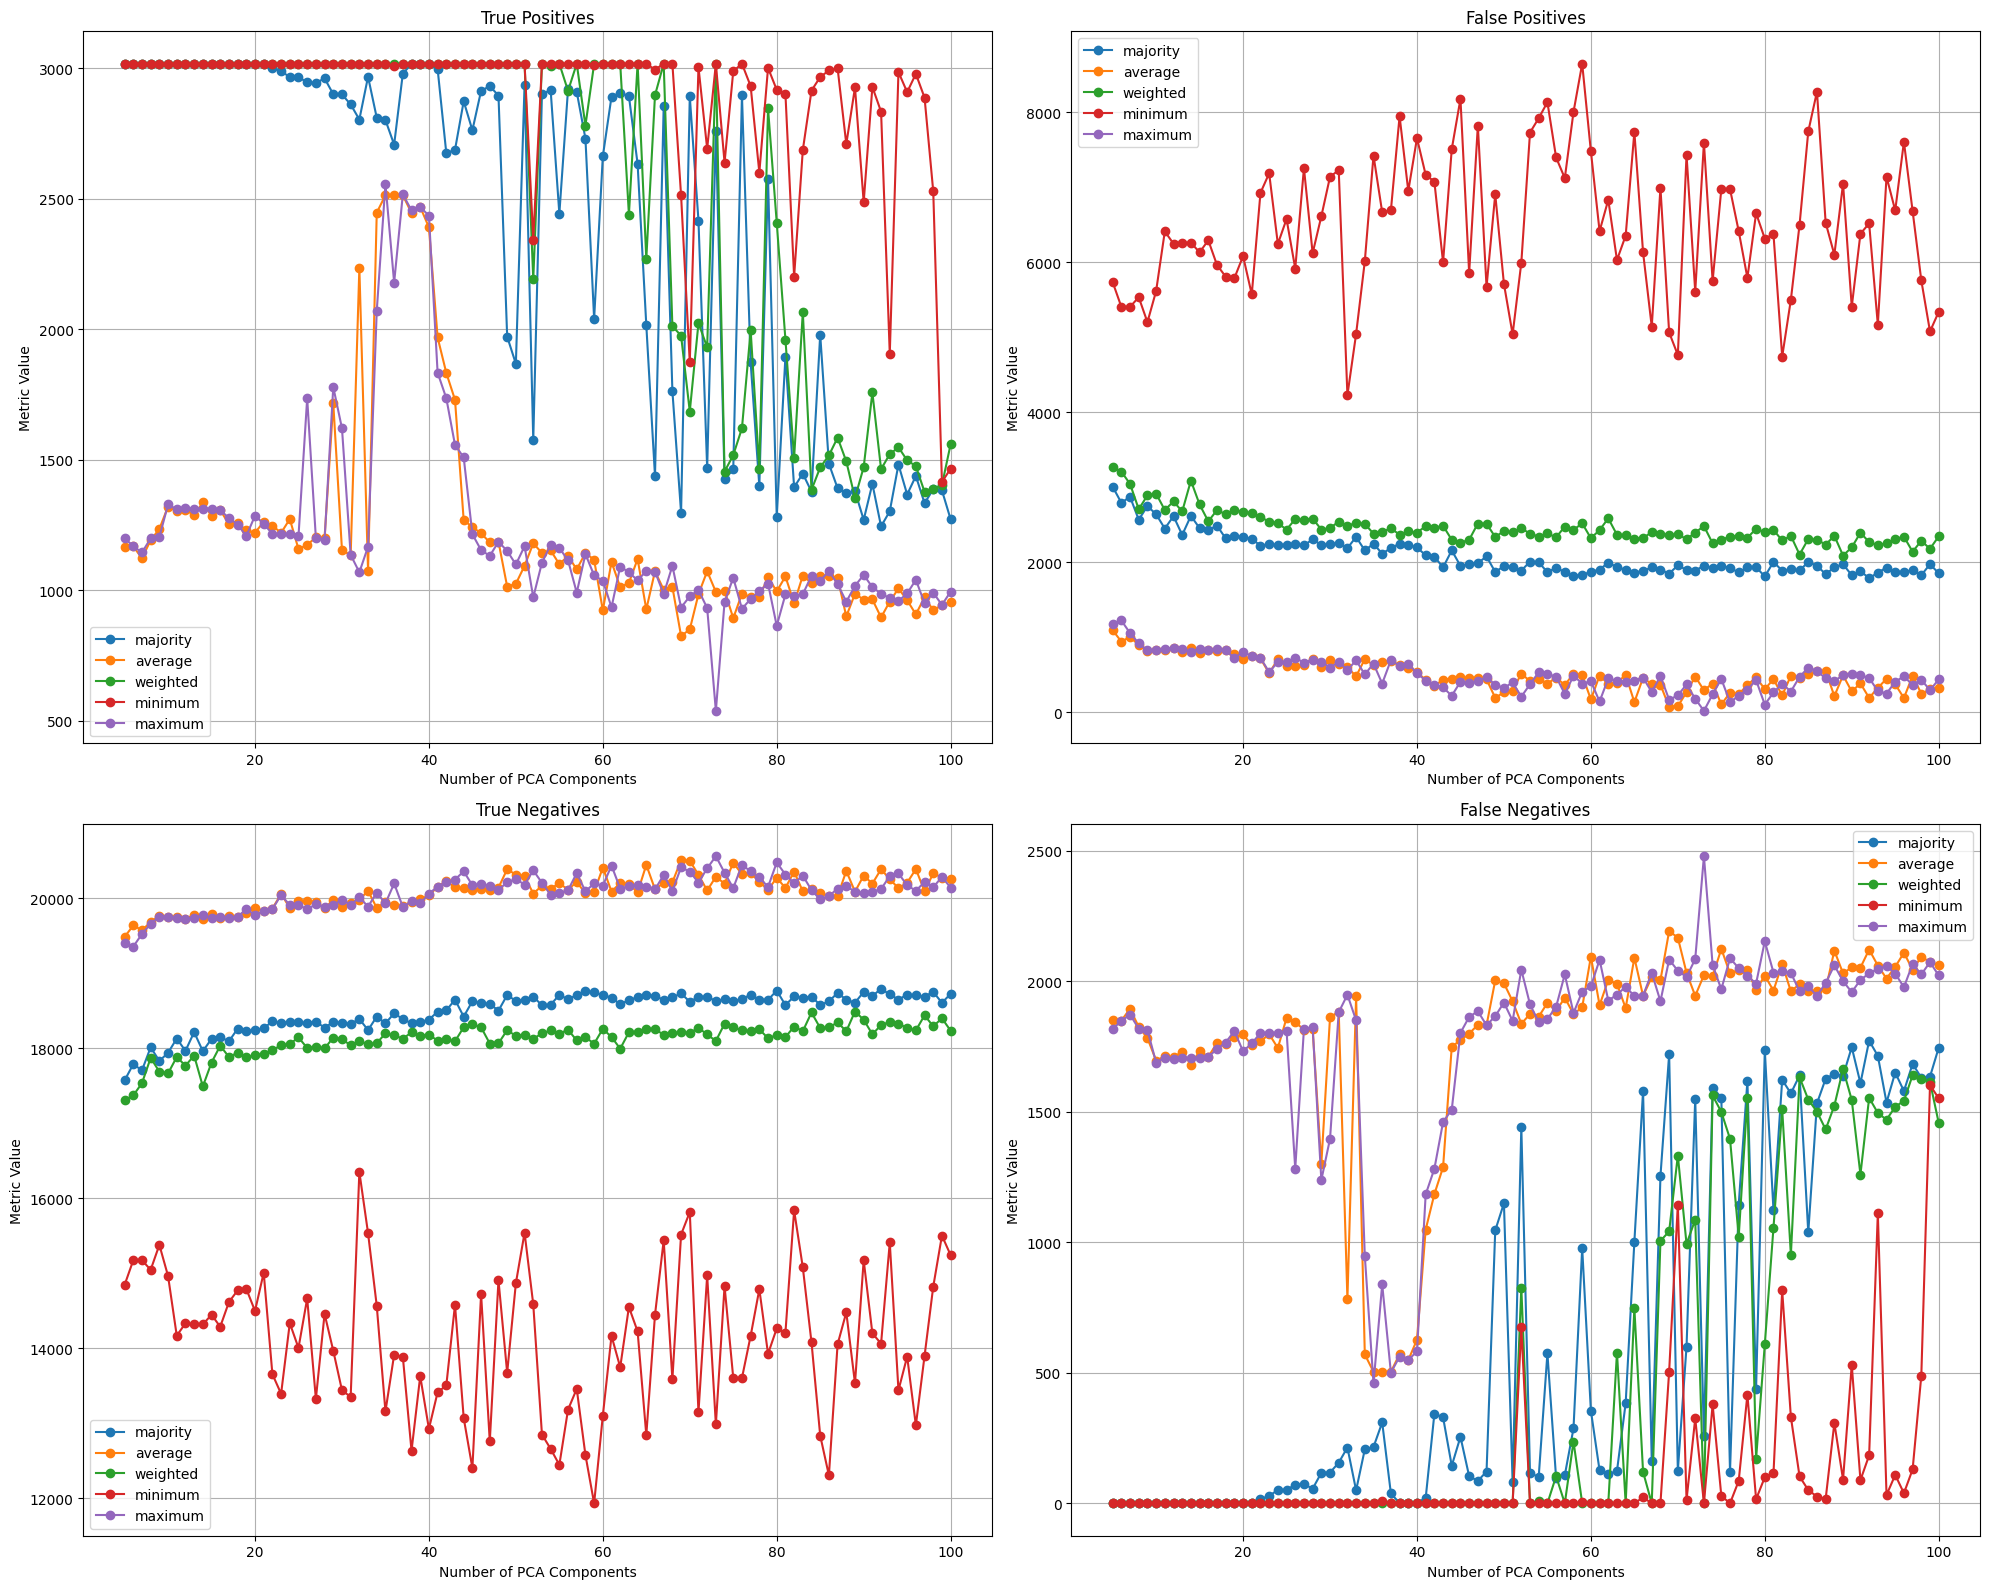

In [11]:
#************************************************************************************************************
#************* #7. Plot the results *************************************************************************
#************************************************************************************************************

# Define the second set of metrics to plot
metrics_set_2 = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Plot each metric in the second set in its own subplot
for i, metric in enumerate(metrics_set_2):
    row = i // 2
    col = i % 2
    for voting in voting_methods:
        subset = results_df[results_df['Voting'] == voting]
        axs[row, col].plot(subset['Components'], subset[metric], marker='o', linestyle='-', label=voting)
    axs[row, col].set_xlabel('Number of PCA Components')
    axs[row, col].set_ylabel('Metric Value')
    axs[row, col].set_title(metric)
    axs[row, col].grid(True)
    axs[row, col].legend()

# Adjust layout
plt.tight_layout()
plt.show()

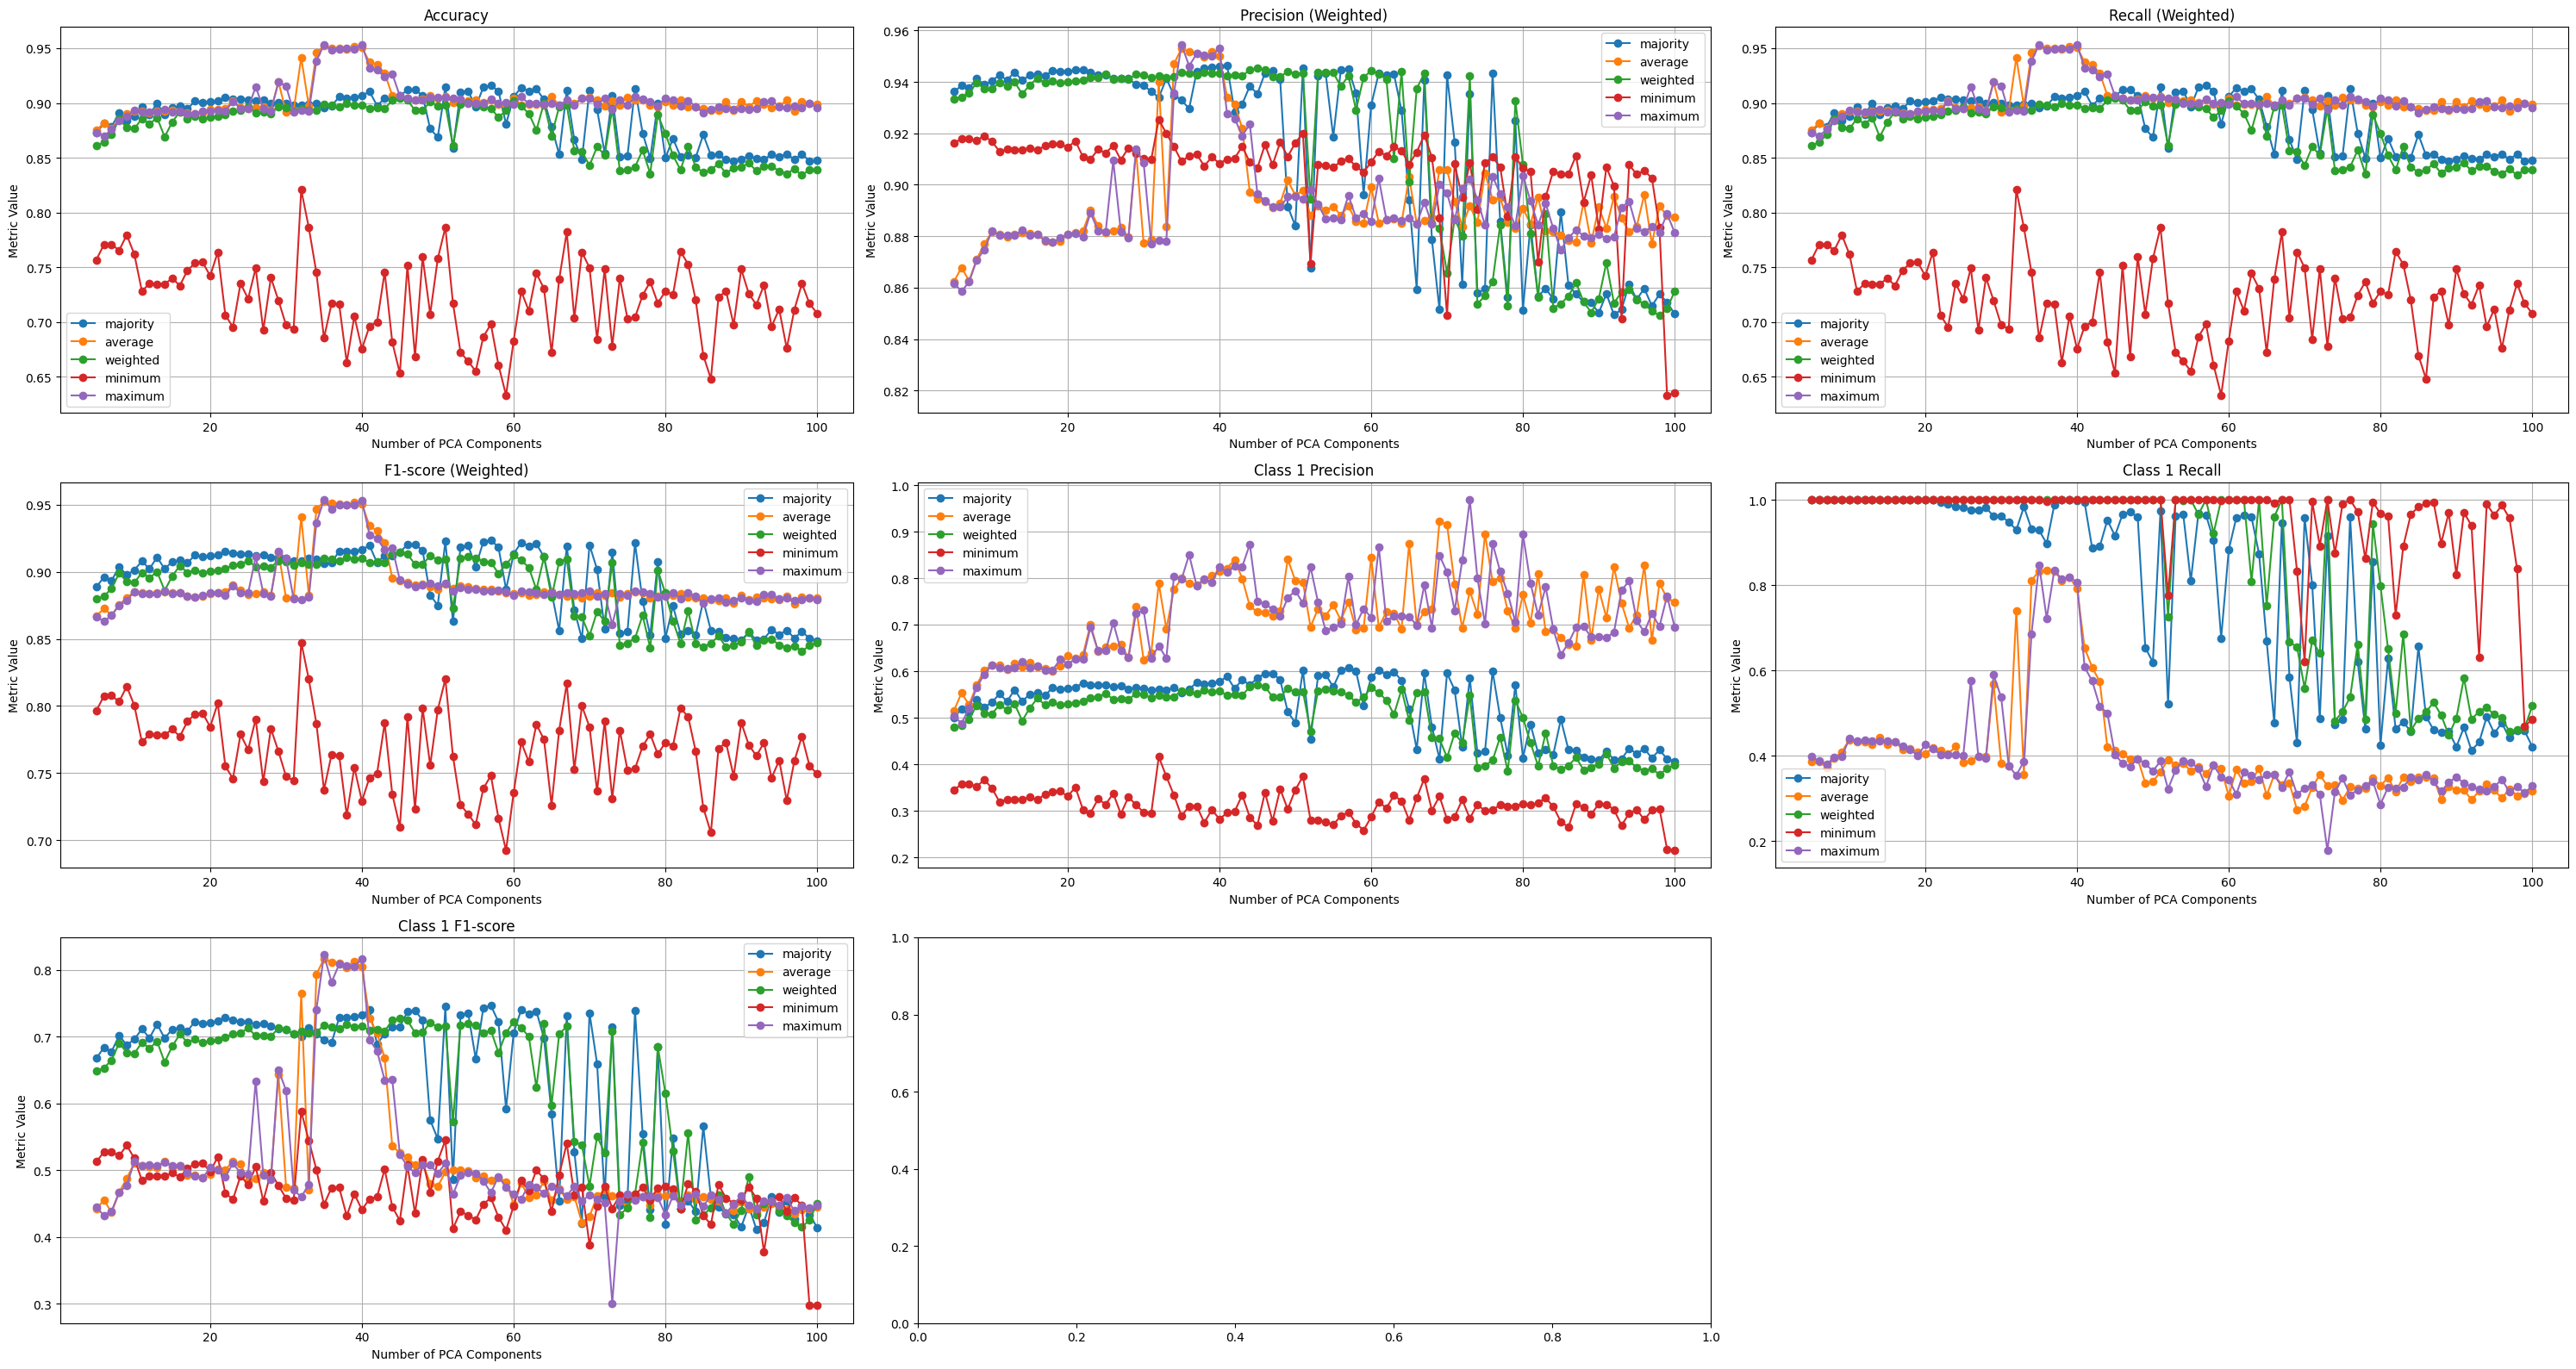

In [13]:
#************************************************************************************************************
#************* #8. Plot the results ***************************************************************************
#************************************************************************************************************


# Define the first set of metrics to plot
metrics_set_1 = [
    'Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-score (Weighted)',
    'Class 1 Precision', 'Class 1 Recall', 'Class 1 F1-score'
]

# Create a 3x3 subplot grid
fig, axs = plt.subplots(3, 3, figsize=(30, 16))

# Plot each metric in the first set in its own subplot
for i, metric in enumerate(metrics_set_1):
    row = i // 3
    col = i % 3
    for voting in voting_methods:
        subset = results_df[results_df['Voting'] == voting]
        axs[row, col].plot(subset['Components'], subset[metric], marker='o', linestyle='-', label=voting)
    axs[row, col].set_xlabel('Number of PCA Components')
    axs[row, col].set_ylabel('Metric Value')
    axs[row, col].set_title(metric)
    axs[row, col].grid(True)
    axs[row, col].legend()

# Hide the last subplot (bottom-right) as it is not used
fig.delaxes(axs[2][2])

# Adjust layout
plt.tight_layout()
plt.show()